<a href="https://colab.research.google.com/github/rfaria/ML-Playground/blob/main/Linear_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url, names=column_names, na_values='?', 
                 comment='\t', sep=' ', skipinitialspace=True)
df.fillna(0, inplace=True)

In [7]:
df.shape

(398, 8)

In [2]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

y = df['Horsepower']
X = df.loc[:, df.columns != 'Horsepower']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Simple Linear Regression

In [9]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
y_test_pred = reg.predict(X_test)

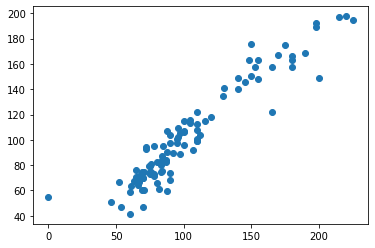

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

9.898106932508282

In [14]:
pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred})

,y_test,y_test_pred
65,153.0,157.975798
132,75.0,78.996090
74,140.0,140.294615
78,87.0,82.309609
37,100.0,115.013509
...,...,...
286,129.0,134.850390
263,165.0,121.783151
146,75.0,73.479770
259,85.0,94.773738


### Ridge Regression

In [21]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.25)

In [22]:
reg.fit(X_train, y_train)

Ridge(alpha=0.25)

In [23]:
y_test_pred = reg.predict(X_test)

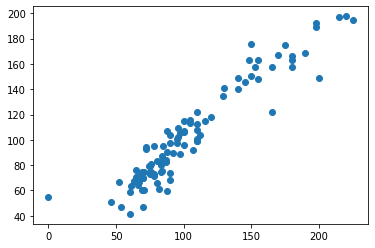

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)

In [25]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

9.898097724171206

In [26]:
pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred})

,y_test,y_test_pred
65,153.0,157.973964
132,75.0,79.006399
74,140.0,140.300379
78,87.0,82.305941
37,100.0,115.020011
...,...,...
286,129.0,134.853992
263,165.0,121.786352
146,75.0,73.500547
259,85.0,94.782440


### XGBoost Regression - Naive

In [27]:
import xgboost as xgb
reg = xgb.XGBRegressor(objective ='reg:linear', 
                       colsample_bytree = 0.3, 
                       learning_rate = 0.1, 
                       max_depth = 5, 
                       alpha = 10, 
                       n_estimators = 10)

In [28]:
reg.fit(X_train, y_train)

[18:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10)

In [29]:
y_test_pred = reg.predict(X_test)

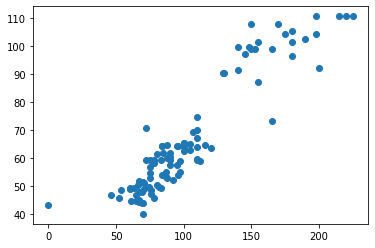

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

38.58723937988281

In [32]:
pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred})

,y_test,y_test_pred
65,153.0,98.743774
132,75.0,59.407269
74,140.0,91.374374
78,87.0,53.434189
37,100.0,65.531052
...,...,...
286,129.0,90.466347
263,165.0,73.148033
146,75.0,56.743656
259,85.0,61.783558


### XGBoost Regression - Hyperparameters Optimization



In [58]:
!pip install optuna

     |████████████████████████████████| 308 kB 4.3 MB/s 
     |████████████████████████████████| 210 kB 36.3 MB/s 
     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
     |████████████████████████████████| 113 kB 36.4 MB/s 
     |████████████████████████████████| 146 kB 33.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6b87220467f1146012d9784ef23f1f400ee7e77f4e9955456a61e797c38aefca
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [62]:
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial,data=X,target=y):
    
    train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15,random_state=123)
    param = {
        'tree_method':'hist',
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.009,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 4000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17,20]),
        'random_state': trial.suggest_categorical('random_state', [24, 48,2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [63]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2022-04-27 19:35:28,380] A new study created in memory with name: no-name-0e8f36df-7f41-4fc9-96db-69d172c5b2de


[19:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:29,087] Trial 0 finished with value: 40.422642174243244 and parameters: {'lambda': 2.9642557807439482, 'alpha': 0.004181171855125556, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 13, 'random_state': 48, 'min_child_weight': 232}. Best is trial 0 with value: 40.422642174243244.


[19:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:29,677] Trial 1 finished with value: 40.422642695297206 and parameters: {'lambda': 0.014965922662259346, 'alpha': 0.048051916543446815, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 278}. Best is trial 0 with value: 40.422642174243244.


[19:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:29,933] Trial 2 finished with value: 40.422642317178926 and parameters: {'lambda': 0.6914296418463952, 'alpha': 7.518693151712953, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 263}. Best is trial 0 with value: 40.422642174243244.


[19:35:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:30,321] Trial 3 finished with value: 40.422642450478136 and parameters: {'lambda': 0.0013769818836999155, 'alpha': 0.0011115696623222415, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.012, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 81}. Best is trial 0 with value: 40.422642174243244.


[19:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:30,966] Trial 4 finished with value: 12.976027121452853 and parameters: {'lambda': 0.07458762684821876, 'alpha': 3.8701518903648644, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 11}. Best is trial 4 with value: 12.976027121452853.


[19:35:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:31,257] Trial 5 finished with value: 40.42264230569137 and parameters: {'lambda': 0.005819104649994918, 'alpha': 0.001174078859964391, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.018, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 231}. Best is trial 4 with value: 12.976027121452853.


[19:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:31,564] Trial 6 finished with value: 40.42264302348789 and parameters: {'lambda': 0.022474339594011815, 'alpha': 0.11179462765189561, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 176}. Best is trial 4 with value: 12.976027121452853.


[19:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:32,079] Trial 7 finished with value: 21.632795229807563 and parameters: {'lambda': 8.380526849686387, 'alpha': 0.008143482393630956, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 115}. Best is trial 4 with value: 12.976027121452853.


[19:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:32,463] Trial 8 finished with value: 14.52015331820405 and parameters: {'lambda': 0.006630558856092312, 'alpha': 0.009454450785717845, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 37}. Best is trial 4 with value: 12.976027121452853.


[19:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:32,944] Trial 9 finished with value: 40.42264275729727 and parameters: {'lambda': 0.07458120961926222, 'alpha': 1.170594080375287, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 202}. Best is trial 4 with value: 12.976027121452853.


[19:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:33,930] Trial 10 finished with value: 13.023379250058735 and parameters: {'lambda': 0.4829662656609358, 'alpha': 9.614411585049716, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 11}. Best is trial 4 with value: 12.976027121452853.


[19:35:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:35,035] Trial 11 finished with value: 13.10472991912463 and parameters: {'lambda': 0.3598956527996676, 'alpha': 7.292486618260863, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 2}. Best is trial 4 with value: 12.976027121452853.


[19:35:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:36,129] Trial 12 finished with value: 20.01440209954164 and parameters: {'lambda': 0.2558310275048836, 'alpha': 0.9501035856882435, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 61}. Best is trial 4 with value: 12.976027121452853.


[19:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:36,681] Trial 13 finished with value: 40.42264593641534 and parameters: {'lambda': 0.09816477586509217, 'alpha': 1.5914802139565878, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 122}. Best is trial 4 with value: 12.976027121452853.


[19:35:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:37,438] Trial 14 finished with value: 12.302439532218907 and parameters: {'lambda': 1.31712687361966, 'alpha': 0.2805420260407594, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 2}. Best is trial 14 with value: 12.302439532218907.


[19:35:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:40,390] Trial 15 finished with value: 24.25861719820378 and parameters: {'lambda': 1.8589259150665831, 'alpha': 0.22446304261490457, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 75}. Best is trial 14 with value: 12.302439532218907.


[19:35:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:41,609] Trial 16 finished with value: 16.817914798118203 and parameters: {'lambda': 0.05871844578209169, 'alpha': 0.421676060389288, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 40}. Best is trial 14 with value: 12.302439532218907.


[19:35:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:42,569] Trial 17 finished with value: 21.834252630837934 and parameters: {'lambda': 1.691818737067726, 'alpha': 0.039035759052868296, 'colsample_bytree': 0.7, 'subsample': 0.7, 'learning_rate': 0.01, 'max_depth': 17, 'random_state': 24, 'min_child_weight': 117}. Best is trial 14 with value: 12.302439532218907.


[19:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:43,004] Trial 18 finished with value: 14.250474947515801 and parameters: {'lambda': 7.73347008546487, 'alpha': 2.553341984340309, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.018, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 27}. Best is trial 14 with value: 12.302439532218907.


[19:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:43,372] Trial 19 finished with value: 40.42264401957904 and parameters: {'lambda': 0.20217631128107966, 'alpha': 0.4035307324317401, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 2020, 'min_child_weight': 154}. Best is trial 14 with value: 12.302439532218907.


[19:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:43,776] Trial 20 finished with value: 21.410920874542573 and parameters: {'lambda': 0.031116679654910842, 'alpha': 0.08016751349416755, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 60}. Best is trial 14 with value: 12.302439532218907.


[19:35:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:44,908] Trial 21 finished with value: 13.10472991912463 and parameters: {'lambda': 0.6292888188261382, 'alpha': 3.9732673980549658, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 2}. Best is trial 14 with value: 12.302439532218907.


[19:35:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:46,500] Trial 22 finished with value: 12.96353443378719 and parameters: {'lambda': 0.8413135968232328, 'alpha': 9.796090374565276, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 1}. Best is trial 14 with value: 12.302439532218907.


[19:35:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:47,087] Trial 23 finished with value: 14.620507238825184 and parameters: {'lambda': 1.0077223222199694, 'alpha': 3.0603147368710273, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 33}. Best is trial 14 with value: 12.302439532218907.


[19:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:47,617] Trial 24 finished with value: 21.661089315526265 and parameters: {'lambda': 3.7083214461031173, 'alpha': 0.7456535609035468, 'colsample_bytree': 1.0, 'subsample': 0.6, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 97}. Best is trial 14 with value: 12.302439532218907.


[19:35:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:48,151] Trial 25 finished with value: 15.259825645646519 and parameters: {'lambda': 0.17826580667260797, 'alpha': 2.418544350325745, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 52}. Best is trial 14 with value: 12.302439532218907.


[19:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:49,365] Trial 26 finished with value: 13.21409404897218 and parameters: {'lambda': 1.2295333378179312, 'alpha': 4.843419172184714, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.012, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 18}. Best is trial 14 with value: 12.302439532218907.


[19:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:49,939] Trial 27 finished with value: 20.534843360618716 and parameters: {'lambda': 2.9970775075415355, 'alpha': 0.22106915405824007, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.012, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 83}. Best is trial 14 with value: 12.302439532218907.


[19:35:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:50,677] Trial 28 finished with value: 14.127684671359312 and parameters: {'lambda': 0.15252390396551774, 'alpha': 0.586486169176992, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 7, 'random_state': 48, 'min_child_weight': 23}. Best is trial 14 with value: 12.302439532218907.


[19:35:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:51,320] Trial 29 finished with value: 15.082160679919584 and parameters: {'lambda': 4.546046550053231, 'alpha': 0.018718326166563836, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 13, 'random_state': 2020, 'min_child_weight': 51}. Best is trial 14 with value: 12.302439532218907.


[19:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:51,727] Trial 30 finished with value: 40.422642695297206 and parameters: {'lambda': 0.04706673416531834, 'alpha': 2.131696513483698, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.012, 'max_depth': 9, 'random_state': 48, 'min_child_weight': 148}. Best is trial 14 with value: 12.302439532218907.


[19:35:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:52,752] Trial 31 finished with value: 12.583533787101159 and parameters: {'lambda': 0.46476499456097414, 'alpha': 9.50362677695563, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 7}. Best is trial 14 with value: 12.302439532218907.


[19:35:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:53,588] Trial 32 finished with value: 14.165686948129277 and parameters: {'lambda': 0.3031814613120523, 'alpha': 5.046716569331233, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 20, 'random_state': 24, 'min_child_weight': 16}. Best is trial 14 with value: 12.302439532218907.


[19:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:54,119] Trial 33 finished with value: 12.526844986831874 and parameters: {'lambda': 0.8404188853006873, 'alpha': 8.385224845487395, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 3}. Best is trial 14 with value: 12.302439532218907.


[19:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:54,669] Trial 34 finished with value: 15.099656964064849 and parameters: {'lambda': 0.8736204466588994, 'alpha': 9.929525341882028, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 40}. Best is trial 14 with value: 12.302439532218907.


[19:35:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:55,015] Trial 35 finished with value: 21.283965766111656 and parameters: {'lambda': 1.8528649840656595, 'alpha': 5.7507039935739686, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 73}. Best is trial 14 with value: 12.302439532218907.


[19:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:55,454] Trial 36 finished with value: 12.922145133564333 and parameters: {'lambda': 0.5041773619081779, 'alpha': 1.484787722147571, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 5}. Best is trial 14 with value: 12.302439532218907.


[19:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:55,722] Trial 37 finished with value: 40.422642317178926 and parameters: {'lambda': 0.5047713698110095, 'alpha': 1.4324678647698283, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 2020, 'min_child_weight': 292}. Best is trial 14 with value: 12.302439532218907.


[19:35:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:55,987] Trial 38 finished with value: 40.422642317178926 and parameters: {'lambda': 0.1335037097276087, 'alpha': 0.19498881441192714, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 244}. Best is trial 14 with value: 12.302439532218907.


[19:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:56,321] Trial 39 finished with value: 14.586841111059032 and parameters: {'lambda': 0.4307113037739535, 'alpha': 1.7275602718515308, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 48, 'min_child_weight': 27}. Best is trial 14 with value: 12.302439532218907.


[19:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:56,763] Trial 40 finished with value: 20.750737034103302 and parameters: {'lambda': 5.530841054652775, 'alpha': 0.1122085358372445, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.018, 'max_depth': 11, 'random_state': 24, 'min_child_weight': 95}. Best is trial 14 with value: 12.302439532218907.


[19:35:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:58,321] Trial 41 finished with value: 12.601972164517836 and parameters: {'lambda': 1.0800390989718782, 'alpha': 6.696577199513192, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 14 with value: 12.302439532218907.


[19:35:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:35:59,886] Trial 42 finished with value: 12.601972164517836 and parameters: {'lambda': 2.201392599408144, 'alpha': 3.8023624643868366, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 14 with value: 12.302439532218907.


[19:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:00,283] Trial 43 finished with value: 13.113863249956626 and parameters: {'lambda': 2.405725918556444, 'alpha': 0.0021333397373242387, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 19}. Best is trial 14 with value: 12.302439532218907.


[19:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:00,643] Trial 44 finished with value: 14.14360270571202 and parameters: {'lambda': 1.1087291821279748, 'alpha': 3.7701027222323975, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 49}. Best is trial 14 with value: 12.302439532218907.


[19:36:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:01,102] Trial 45 finished with value: 14.191277498517561 and parameters: {'lambda': 2.491006580105017, 'alpha': 6.393293925047153, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.016, 'max_depth': 13, 'random_state': 24, 'min_child_weight': 15}. Best is trial 14 with value: 12.302439532218907.


[19:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:01,580] Trial 46 finished with value: 40.422642174243244 and parameters: {'lambda': 1.3418958159960621, 'alpha': 5.889921458978879, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.009, 'max_depth': 17, 'random_state': 2020, 'min_child_weight': 197}. Best is trial 14 with value: 12.302439532218907.


[19:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:01,960] Trial 47 finished with value: 13.79987435964846 and parameters: {'lambda': 0.0014862087285557736, 'alpha': 3.1278670325716296, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 34}. Best is trial 14 with value: 12.302439532218907.


[19:36:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:03,040] Trial 48 finished with value: 19.176259618644973 and parameters: {'lambda': 8.456930787871904, 'alpha': 7.684271104350172, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 7, 'random_state': 24, 'min_child_weight': 67}. Best is trial 14 with value: 12.302439532218907.


[19:36:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2022-04-27 19:36:04,348] Trial 49 finished with value: 12.321307396997014 and parameters: {'lambda': 0.7504844199070764, 'alpha': 1.0070947821407699, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 24, 'min_child_weight': 1}. Best is trial 14 with value: 12.302439532218907.


Number of finished trials: 50
Best trial: {'lambda': 1.31712687361966, 'alpha': 0.2805420260407594, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 2}


In [64]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alpha,params_colsample_bytree,params_lambda,params_learning_rate,params_max_depth,params_min_child_weight,params_random_state,params_subsample,state
0,0,40.422642,2022-04-27 19:35:28.386222,2022-04-27 19:35:29.086581,0 days 00:00:00.700359,0.004181,0.5,2.964256,0.009,13,232,48,1.0,COMPLETE
1,1,40.422643,2022-04-27 19:35:29.094612,2022-04-27 19:35:29.677250,0 days 00:00:00.582638,0.048052,0.4,0.014966,0.012,15,278,48,0.5,COMPLETE
2,2,40.422642,2022-04-27 19:35:29.679666,2022-04-27 19:35:29.932998,0 days 00:00:00.253332,7.518693,0.3,0.691430,0.020,11,263,2020,1.0,COMPLETE
3,3,40.422642,2022-04-27 19:35:29.935920,2022-04-27 19:35:30.321416,0 days 00:00:00.385496,0.001112,0.4,0.001377,0.012,9,81,48,0.4,COMPLETE
4,4,12.976027,2022-04-27 19:35:30.323765,2022-04-27 19:35:30.966363,0 days 00:00:00.642598,3.870152,0.8,0.074588,0.012,20,11,24,0.5,COMPLETE
5,5,40.422642,2022-04-27 19:35:30.968760,2022-04-27 19:35:31.257178,0 days 00:00:00.288418,0.001174,0.9,0.005819,0.018,15,231,48,0.8,COMPLETE
6,6,40.422643,2022-04-27 19:35:31.259487,2022-04-27 19:35:31.564028,0 days 00:00:00.304541,0.111795,0.5,0.022474,0.016,7,176,2020,0.5,COMPLETE
7,7,21.632795,2022-04-27 19:35:31.566359,2022-04-27 19:35:32.078955,0 days 00:00:00.512596,0.008143,0.8,8.380527,0.012,13,115,24,0.8,COMPLETE
8,8,14.520153,2022-04-27 19:35:32.084967,2022-04-27 19:35:32.463244,0 days 00:00:00.378277,0.009454,0.9,0.006631,0.020,7,37,24,0.6,COMPLETE
9,9,40.422643,2022-04-27 19:35:32.465791,2022-04-27 19:35:32.943486,0 days 00:00:00.477695,1.170594,0.9,0.074581,0.009,17,202,2020,0.7,COMPLETE


In [65]:
optuna.visualization.plot_optimization_history(study)

In [66]:
optuna.visualization.plot_parallel_coordinate(study)

In [67]:
optuna.visualization.plot_slice(study)

In [68]:
optuna.visualization.plot_contour(study, params=['alpha',
                            #'max_depth',
                            'lambda',
                            'subsample',
                            'learning_rate',
                            'subsample'])

In [69]:
optuna.visualization.plot_param_importances(study)

In [70]:
optuna.visualization.plot_edf(study)

In [74]:
best_params = study.best_trial.params
print(best_params)

{'lambda': 1.31712687361966, 'alpha': 0.2805420260407594, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 5, 'random_state': 24, 'min_child_weight': 2}


In [79]:
reg = xgb.XGBRegressor(**best_params)

In [80]:
reg.fit(X_train, y_train)

[19:41:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.2805420260407594, colsample_bytree=0.8,
             lambda=1.31712687361966, learning_rate=0.01, max_depth=5,
             min_child_weight=2, random_state=24, subsample=0.4)

In [81]:
y_test_pred = reg.predict(X_test)

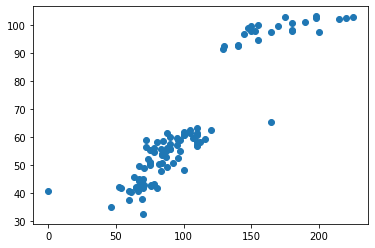

In [82]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)

In [83]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

42.42405467987061

In [84]:
pd.DataFrame({"y_test": y_test, "y_test_pred": y_test_pred})

,y_test,y_test_pred
65,153.0,98.131355
132,75.0,55.508068
74,140.0,92.805038
78,87.0,52.996475
37,100.0,61.757965
...,...,...
286,129.0,91.409889
263,165.0,65.402809
146,75.0,50.531208
259,85.0,58.406883
